In [1]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [0]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df1 = pd.read_csv('/content/drive/My Drive/Capstone_Project/data/Fine_2014_2019_Finger_millet_Min_Blore_Mysore.csv')
df1.head()

,district,commodity,Arrival Date,variety,Min_price
0,Mysore,Ragi (Finger Millet),02-01-14,Fine,1600
1,Mysore,Ragi (Finger Millet),03-01-14,Fine,2000
2,Mysore,Ragi (Finger Millet),04-01-14,Fine,1800
3,Mysore,Ragi (Finger Millet),07-01-14,Fine,2000
4,Mysore,Ragi (Finger Millet),08-01-14,Fine,2100


In [5]:
gp = pd.pivot_table(df1,values='Min_price',columns=['district','commodity'],index=['Arrival Date'])
#gp = gp.sort_index(axis='columns', level='Arrival Date')
gp.head()

district,Bangalore,Mysore
commodity,Ragi (Finger Millet),Ragi (Finger Millet)
Arrival Date,,
01-01-15,1900,1900
01-01-16,1800,1800
01-01-18,2800,2800
01-01-19,2800,2800
01-02-15,1900,1900


In [6]:
flattened = pd.DataFrame(gp.to_records())
flattened['Arrival Date'] = pd.to_datetime(flattened['Arrival Date'])
flattened = flattened.sort_values(by=['Arrival Date'],ascending=True)
df = flattened.reset_index()
del df['index']
df.head()

,Arrival Date,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
0,2014-01-03,1800,1800
1,2014-01-04,1800,1800
2,2014-01-06,1800,1800
3,2014-01-07,1700,1700
4,2014-01-08,1850,1850


In [0]:
df1 = df.set_index('Arrival Date').asfreq('D')

In [8]:
df1.head(10)

,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
Arrival Date,,
2014-01-03,1800.0,1800.0
2014-01-04,1800.0,1800.0
2014-01-05,NaN,NaN
2014-01-06,1800.0,1800.0
2014-01-07,1700.0,1700.0
2014-01-08,1850.0,1850.0
2014-01-09,1700.0,1700.0
2014-01-10,1850.0,1850.0
2014-01-11,NaN,NaN


In [0]:
ndf = df1.fillna(method='ffill')

In [10]:
ndf.head(10)

,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
Arrival Date,,
2014-01-03,1800.0,1800.0
2014-01-04,1800.0,1800.0
2014-01-05,1800.0,1800.0
2014-01-06,1800.0,1800.0
2014-01-07,1700.0,1700.0
2014-01-08,1850.0,1850.0
2014-01-09,1700.0,1700.0
2014-01-10,1850.0,1850.0
2014-01-11,1850.0,1850.0


In [0]:
ndf.to_csv('/content/drive/My Drive/Capstone_Project/data/Finger_millet_2006_2019_Complete_after_PreProcessing.csv', encoding='utf-8')

In [12]:
df = pd.read_csv('/content/drive/My Drive/Capstone_Project/data/Finger_millet_2006_2019_Complete_after_PreProcessing.csv')
#del df['Unnamed: 0']
df.head()

,Arrival Date,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
0,2014-01-03,1800.0,1800.0
1,2014-01-04,1800.0,1800.0
2,2014-01-05,1800.0,1800.0
3,2014-01-06,1800.0,1800.0
4,2014-01-07,1700.0,1700.0


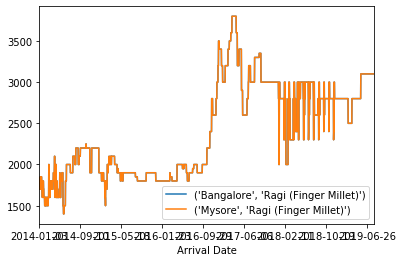

In [13]:
df.plot(x='Arrival Date')

In [14]:
df['Arrival Date'] = pd.to_datetime(df['Arrival Date']).astype('int')
df.describe()

,Arrival Date,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
count,2.044000e+03,2044.00000,2044.00000
mean,1.476965e+18,2406.38454,2406.38454
std,5.099296e+16,566.48057,566.48057
min,1.388707e+18,1400.00000,1400.00000
25%,1.432836e+18,1900.00000,1900.00000
50%,1.476965e+18,2200.00000,2200.00000
75%,1.521094e+18,3000.00000,3000.00000
max,1.565222e+18,3800.00000,3800.00000


In [15]:
training_set = df.iloc[:,[1,2]].values
training_set

array([[1800., 1800.],
       [1800., 1800.],
       [1800., 1800.],
       ...,
       [3100., 3100.],
       [3100., 3100.],
       [3100., 3100.]])

In [0]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(training_set)

In [17]:
train_size = int(len(scaled) * 0.80)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 1635
test: 409


In [18]:
print(train.shape)
print(test.shape)

(1635, 2)
(409, 2)


In [19]:
train

array([[0.16666667, 0.16666667],
       [0.16666667, 0.16666667],
       [0.16666667, 0.16666667],
       ...,
       [0.66666667, 0.66666667],
       [0.66666667, 0.66666667],
       [0.66666667, 0.66666667]])

In [0]:
def create_dataset(dataset, look_back=32):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print("a:")
        print(a)
        print('Y {}'.format(i + look_back))
        b = dataset[i + look_back]
        print(b)
        #dataset[i + look_back,1:2]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [21]:
look_back = 17
#32
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

1635 17
0
X 0 to 17
a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.125      0.125     ]
 [0.125      0.125     ]]
Y 17
[0.125 0.125]
1
X 1 to 18
a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.125      0.125     ]
 [0.125      0.125     ]
 [0.125      0.125     ]]
Y 18
[0.08333333 0.08333333]
2
X 2 to 19
a:
[[0.16666667 0.16666667]
 [0.16666667 0.1666666

In [22]:
y_train[0]

array([0.125, 0.125])

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1617, 17, 2)
(391, 17, 2)
(1617, 2)
(391, 2)


In [0]:
#X_test

In [25]:
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],X_train.shape[2] ))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
print(X_train.shape)
print(X_test.shape)

(1617, 17, 2)
(391, 17, 2)


In [30]:
batch_size = 1
model = Sequential()
model.add(LSTM(units=200, batch_input_shape=(batch_size, look_back, 2),return_sequences=True, stateful=True))
#model.add(LSTM(50, return_sequences=True))  
model.add(LSTM(units=200, batch_input_shape=(batch_size, look_back, 2),return_sequences=True, stateful=True))
model.add(LSTM(units=200, batch_input_shape=(batch_size, look_back, 2), stateful=True))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (1, 17, 200)              162400    
_________________________________________________________________
lstm_11 (LSTM)               (1, 17, 200)              320800    
_________________________________________________________________
lstm_12 (LSTM)               (1, 200)                  320800    
_________________________________________________________________
dense_3 (Dense)              (1, 2)                    402       
Total params: 804,402
Trainable params: 804,402
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





 - 147s - loss: 0.0063
Epoch 2/10
 - 133s - loss: 0.0026
Epoch 3/10
 - 133s - loss: 0.0026
Epoch 4/10
 - 136s - loss: 0.0022
Epoch 5/10
 - 139s - loss: 0.0021
Epoch 6/10
 - 139s - loss: 0.0021
Epoch 7/10
 - 140s - loss: 0.0019
Epoch 8/10
 - 138s - loss: 0.0019
Epoch 9/10
 - 137s - loss: 0.0019
Epoch 10/10
 - 135s - loss: 0.0018


In [0]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))

In [0]:
#X_test

In [0]:
#testPredict = model.predict(X_test, batch_size=batch_size)
#print(testPredict.shape)
#testPredict
#testPredict = scaler.inverse_transform(testPredict)


In [34]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform(y_test)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[0]))
print('Train Score column 0: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[0]))
print('Test Score column 0: %.2f RMSE' % (testScore))
trainScore = math.sqrt(mean_squared_error(y_train[1], trainPredict[1]))
print('Train Score column 1: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[1], testPredict[1]))
print('Test Score column 1: %.2f RMSE' % (testScore))

Train Score column 0: 34.53 RMSE
Test Score column 0: 194.01 RMSE
Train Score column 1: 108.88 RMSE
Test Score column 1: 5.77 RMSE


In [35]:
y_test

array([[3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [2800., 2800.],
       [2300., 2300.],
       [2300., 2300.],
       [3000., 3000.],
       [3000., 3000.],
       [3000., 3000.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [2600., 2600.],
       [260

In [36]:
testPredict

array([[2805.59  , 2806.3994],
       [3006.0056, 3005.5188],
       [3009.9248, 3009.5752],
       [3005.7825, 3005.8955],
       [3009.2021, 3009.4016],
       [3014.7866, 3015.0176],
       [3018.4575, 3018.7546],
       [3020.1467, 3020.5217],
       [3021.0938, 3021.5369],
       [3021.715 , 3022.2097],
       [3022.112 , 3022.64  ],
       [3022.3628, 3022.9175],
       [3022.5134, 3023.0884],
       [3022.6165, 3023.2107],
       [3022.6694, 3023.275 ],
       [3022.7007, 3023.3145],
       [3022.7195, 3023.338 ],
       [3022.729 , 3023.3516],
       [3022.729 , 3023.3516],
       [3022.729 , 3023.3516],
       [3022.729 , 3023.3516],
       [2827.347 , 2829.391 ],
       [2334.054 , 2337.686 ],
       [2332.8684, 2337.035 ],
       [3116.9817, 3117.4631],
       [2965.0586, 2965.4294],
       [2987.8735, 2988.4812],
       [2601.9905, 2604.819 ],
       [2583.3108, 2585.952 ],
       [2646.9666, 2647.9175],
       [2622.3623, 2623.1353],
       [2606.0605, 2607.204 ],
       [

In [37]:
trainPredict

array([[1734.3206, 1734.7444],
       [1708.536 , 1709.2306],
       [1627.6139, 1627.1884],
       ...,
       [3021.6685, 3022.152 ],
       [3022.1123, 3022.6404],
       [3022.3628, 3022.9175]], dtype=float32)

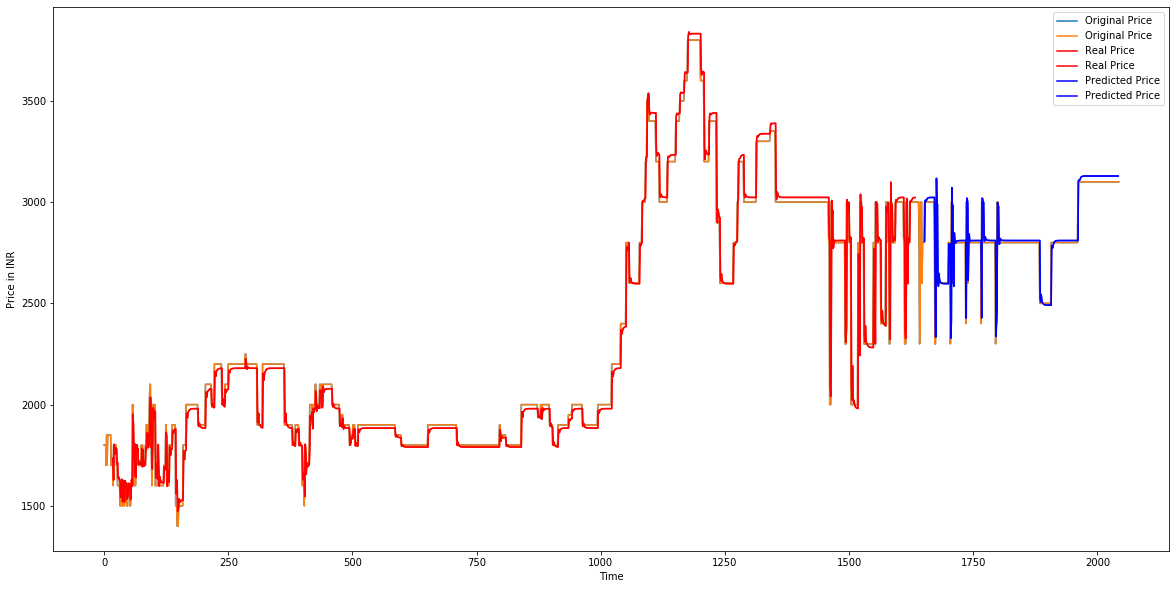

In [38]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled),label = 'Original Price')
plt.plot(trainPredictPlot, color = 'red', label = 'Real Price')
plt.plot(testPredictPlot, color = 'blue', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price in INR')
plt.legend()
#plt.plot(x='Arrival Date')
plt.show()